In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-yield-prediction-dataset/yield.csv
/kaggle/input/crop-yield-prediction-dataset/temp.csv
/kaggle/input/crop-yield-prediction-dataset/rainfall.csv
/kaggle/input/crop-yield-prediction-dataset/pesticides.csv
/kaggle/input/crop-yield-prediction-dataset/yield_df.csv


In [2]:
data=pd.read_csv("/kaggle/input/crop-yield-prediction-dataset/yield_df.csv")
print(data.head(10))

   Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   
5           5  Albania        Wheat  1990        30197   
6           6  Albania        Maize  1991        29068   
7           7  Albania     Potatoes  1991        77818   
8           8  Albania  Rice, paddy  1991        28538   
9           9  Albania      Sorghum  1991         6667   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0         

In [3]:
# Display basic information and descriptive statistics for each column
info = data.info()
description = data.describe(include='all')

info, description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


(None,
           Unnamed: 0   Area      Item          Year    hg/ha_yield  \
 count   28242.000000  28242     28242  28242.000000   28242.000000   
 unique           NaN    101        10           NaN            NaN   
 top              NaN  India  Potatoes           NaN            NaN   
 freq             NaN   4048      4276           NaN            NaN   
 mean    14120.500000    NaN       NaN   2001.544296   77053.332094   
 std      8152.907488    NaN       NaN      7.051905   84956.612897   
 min         0.000000    NaN       NaN   1990.000000      50.000000   
 25%      7060.250000    NaN       NaN   1995.000000   19919.250000   
 50%     14120.500000    NaN       NaN   2001.000000   38295.000000   
 75%     21180.750000    NaN       NaN   2008.000000  104676.750000   
 max     28241.000000    NaN       NaN   2013.000000  501412.000000   
 
         average_rain_fall_mm_per_year  pesticides_tonnes      avg_temp  
 count                     28242.00000       28242.000000  28242.

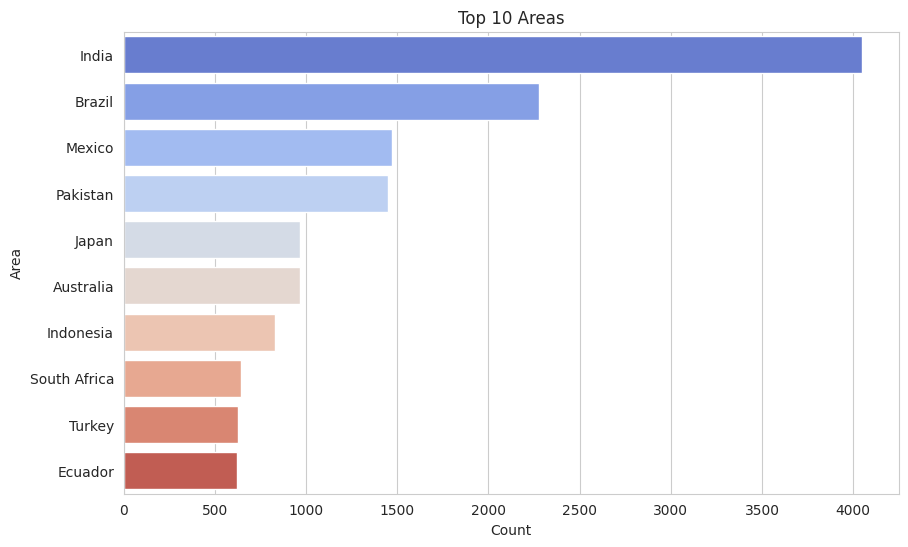

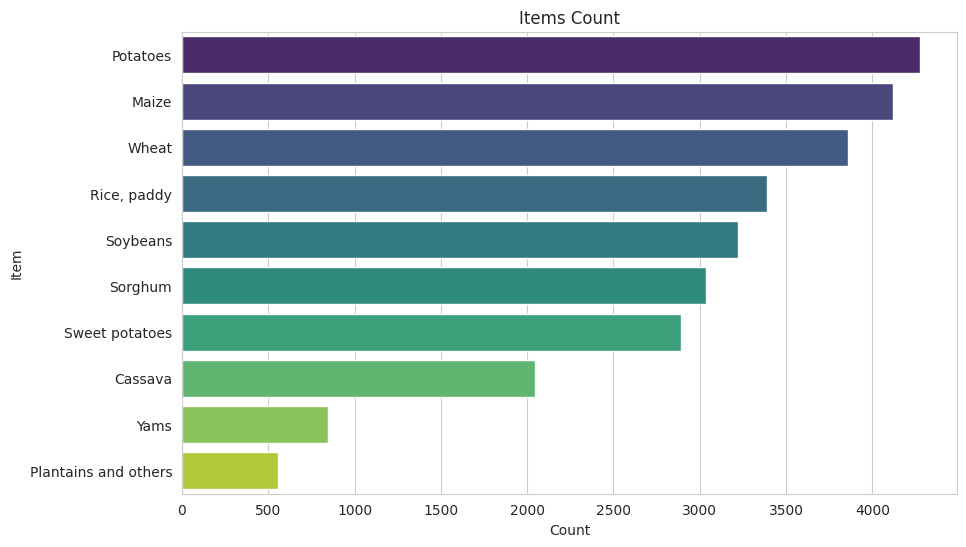

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


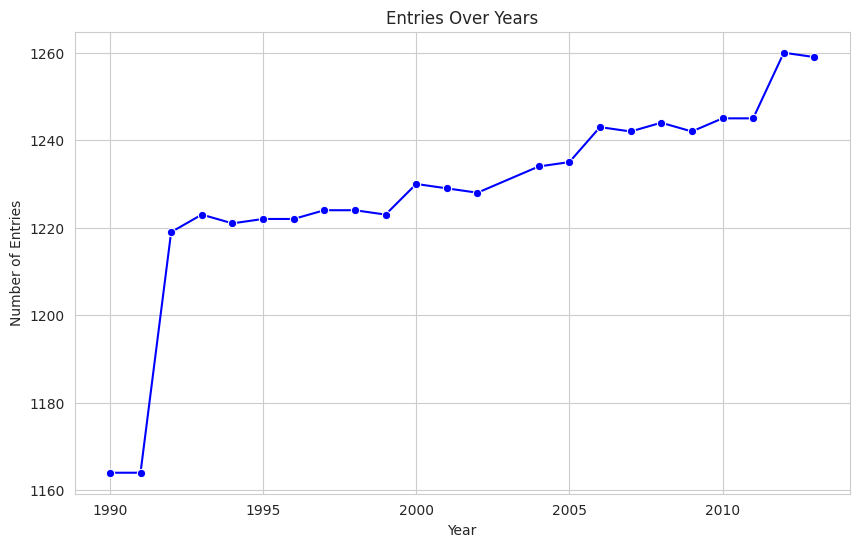

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


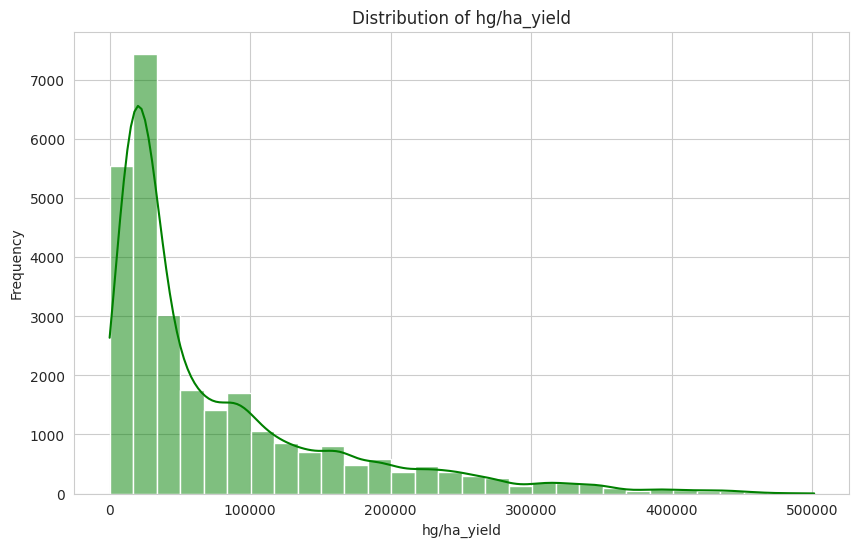

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


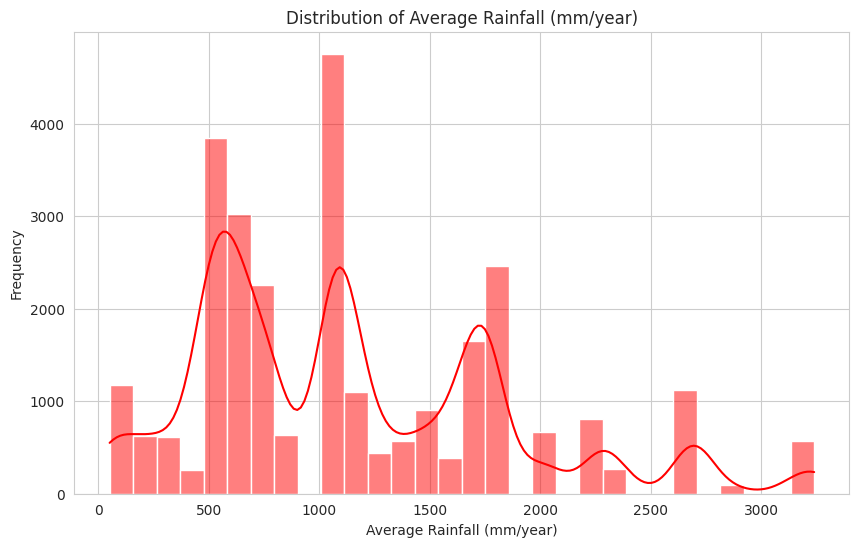

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


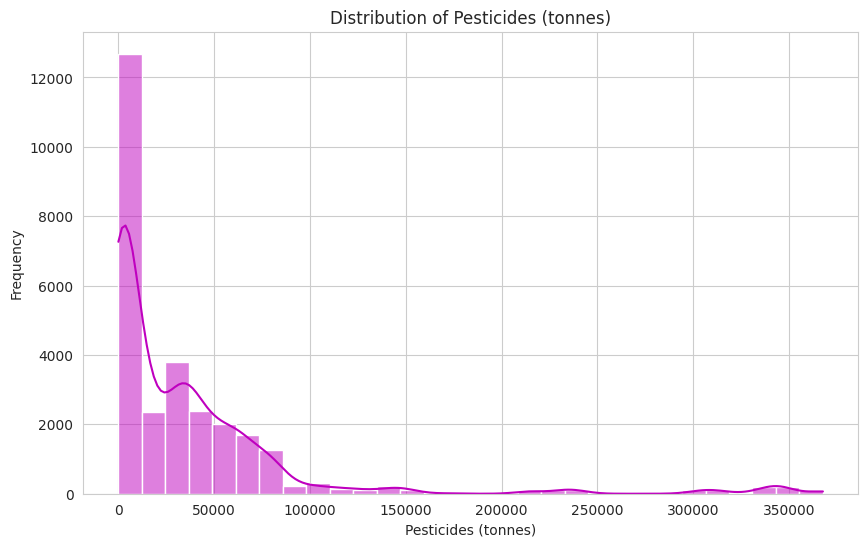

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


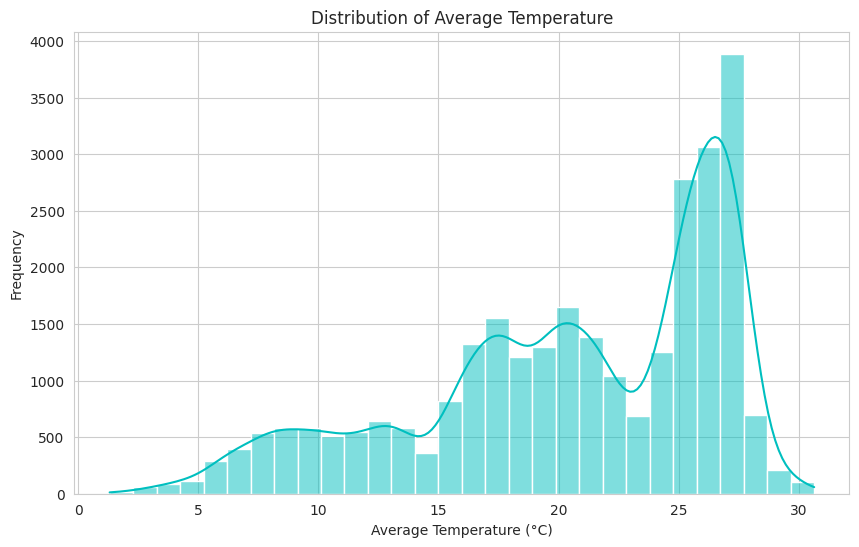

In [4]:
# Plot for each column with appropriate visualizations

import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Increase the default figure size for better readability
plt.rcParams['figure.figsize'] = [10, 6]

## Area (Bar Plot of Top 10 Areas)
plt.figure()
area_counts = data['Area'].value_counts().head(10)
sns.barplot(x=area_counts.values, y=area_counts.index, palette='coolwarm')
plt.title('Top 10 Areas')
plt.xlabel('Count')
plt.ylabel('Area')
plt.show()

## Item (Bar Plot of Items)
plt.figure()
item_counts = data['Item'].value_counts()
sns.barplot(x=item_counts.values, y=item_counts.index, palette='viridis')
plt.title('Items Count')
plt.xlabel('Count')
plt.ylabel('Item')
plt.show()

## Year (Line Plot of Entries Over Years)
plt.figure()
year_counts = data['Year'].value_counts().sort_index()
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='b')
plt.title('Entries Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.show()

## hg/ha_yield (Histogram)
plt.figure()
sns.histplot(data['hg/ha_yield'], bins=30, kde=True, color='g')
plt.title('Distribution of hg/ha_yield')
plt.xlabel('hg/ha_yield')
plt.ylabel('Frequency')
plt.show()

## average_rain_fall_mm_per_year (Histogram)
plt.figure()
sns.histplot(data['average_rain_fall_mm_per_year'], bins=30, kde=True, color='r')
plt.title('Distribution of Average Rainfall (mm/year)')
plt.xlabel('Average Rainfall (mm/year)')
plt.ylabel('Frequency')
plt.show()

## pesticides_tonnes (Histogram)
plt.figure()
sns.histplot(data['pesticides_tonnes'], bins=30, kde=True, color='m')
plt.title('Distribution of Pesticides (tonnes)')
plt.xlabel('Pesticides (tonnes)')
plt.ylabel('Frequency')
plt.show()

## avg_temp (Histogram)
plt.figure()
sns.histplot(data['avg_temp'], bins=30, kde=True, color='c')
plt.title('Distribution of Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


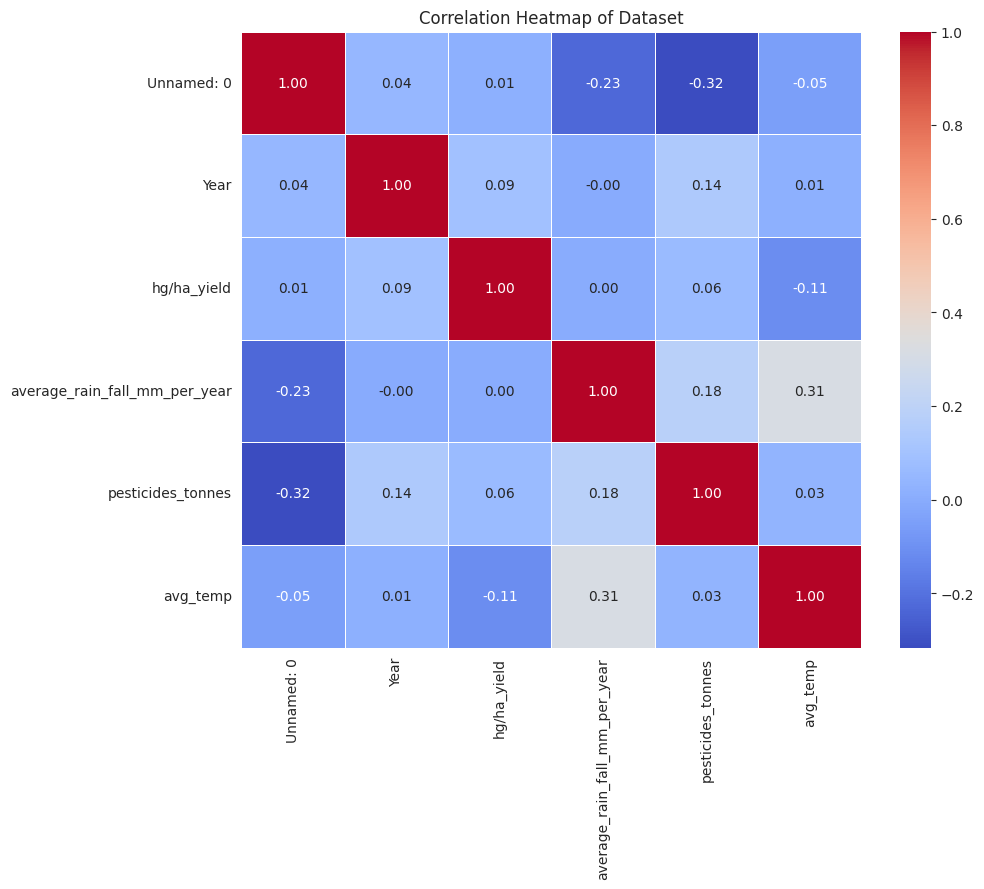

In [5]:
# Creating a correlation heatmap for the numerical columns in the dataset

# Calculate the correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Dataset')
plt.show()


RMSE XGBoot: 15710.22679308867
Acc XGBoost: 0.9659743055818336
RMSE RF: 14006.281839678952
Acc RF: 0.9729549486438772


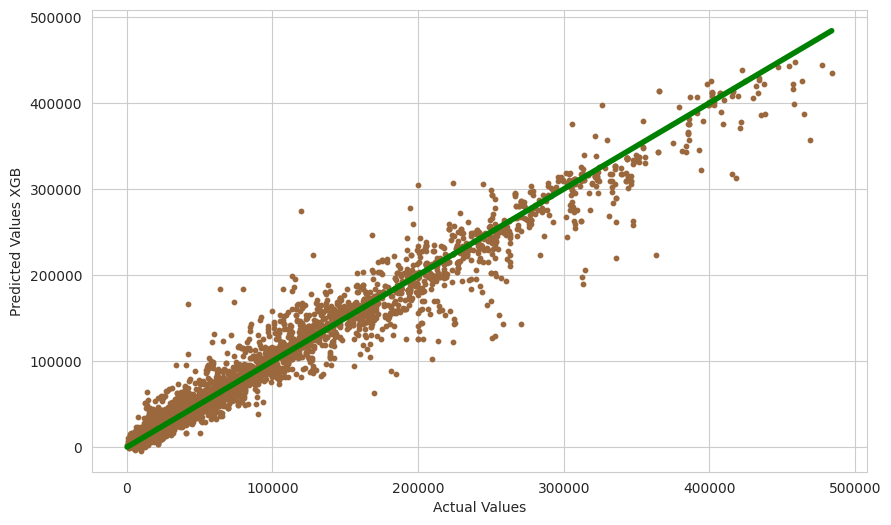

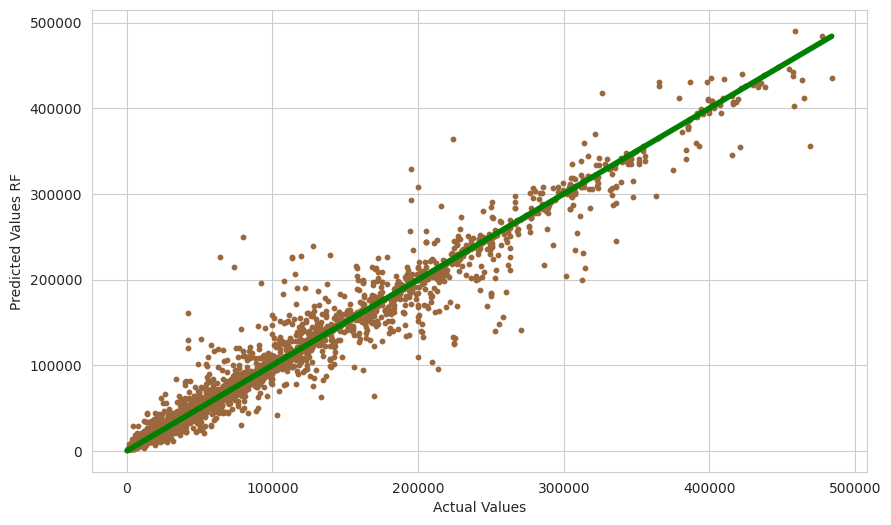

In [6]:
# Train XGBoost and Random Forest to predict the yield based on country, item, pesticide, avg_temp and rainfall
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np


# Rename columns for clarity
data_renamed = data.rename(columns={
    "hg/ha_yield": "Yield",
    "average_rain_fall_mm_per_year": "Rainfall",
    "pesticides_tonnes": "Pesticides",
    "avg_temp": "Avg_Temp"
})

# Drop the index column if it's not needed
data_cleaned = data_renamed.drop(columns=["Unnamed: 0"])

# Encode categorical variables
le_country = LabelEncoder()
le_item = LabelEncoder()
data_cleaned['Country_Encoded'] = le_country.fit_transform(data_cleaned['Area'])
data_cleaned['Item_Encoded'] = le_item.fit_transform(data_cleaned['Item'])

# Define features and target variable
X = data_cleaned[['Country_Encoded', 'Item_Encoded', 'Pesticides', 'Avg_Temp', 'Rainfall']]
y = data_cleaned['Yield']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(X_train, y_train)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)


# Evaluate the model
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
accuracy_xgb = xgb_model.score(X_test, y_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
accuracy_rf = rf_model.score(X_test, y_test)

print(f"RMSE XGBoot: {rmse_xgb}")
print(f"Acc XGBoost: {accuracy_xgb}")

print(f"RMSE RF: {rmse_rf}")
print(f"Acc RF: {accuracy_rf}")

plt.scatter(y_test, y_pred_xgb,s=10,color='#9B673C')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values XGB')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
plt.show()

plt.scatter(y_test, y_pred_rf,s=10,color='#9B673C')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values RF')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
plt.show()

We can see the XGBoost has a accuracy of 96% and Random Forest has an accuracy of 97%